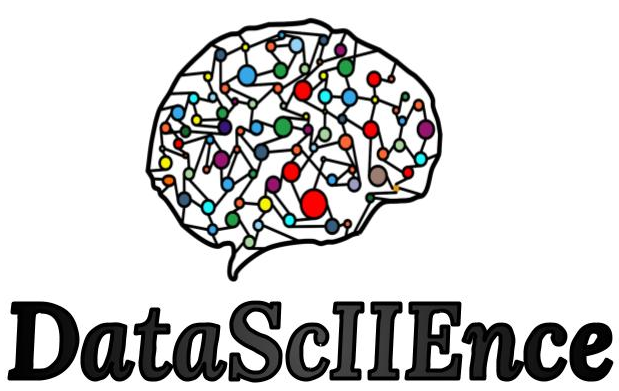

# Introduction au Deep Learning

## Qu'est ce que le Deep Learning

Le deep learning est une sous-catégorie du machine learning qui utilise des réseaux neuronaux multicouches, appelés réseaux neuronaux profonds, pour simuler le pouvoir de décision complexe du cerveau humain. Une forme ou une autre de deep learning alimente aujourd’hui la plupart des applications d’intelligence artificielle (IA) que nous utilisons.
La différence avec le Machine Learning(ML) réside dans le faite que le ML a souvent besoin d'un humain pour lui dire quoi regarder (par exemple : "fais attention à la couleur des pixels pour reconnaître une pomme"). Le Deep Learning est autonome. Tu lui donnes l'image brute, et il détermine tout seul que la couleur est importante. Il apprend "par l'exemple", exactement comme un être humain.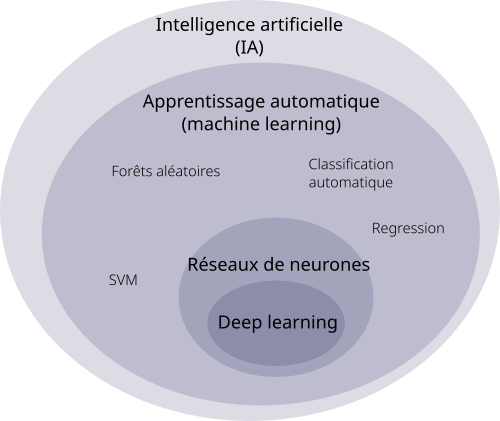

## Réseaux de Neurones (Neural Networks)

Le Deep Learning, c'est fondamentalement du biomimétisme. Dans notre cerveau, on a des neurones qui s'envoient des signaux électriques. Un réseau de neurones artificiel, c'est une imitation mathématique de ce processus.
On ne donne pas à l'ordinateur des règles fixes, On lui donne plutôt une structure capable d'apprendre par l'expérience.

Un réseau de neurones ("Deep Learning" quand il est profond) est structuré comme un mille-feuille en 3 parties, par exemple pour la reconnaissance d'un chiffre sur une image :

- La Couche d'Entrée (Input Layer) : Elle reçoit les données brutes. Dans notre cas, chaque neurone reçoit la valeur d'un pixel (0 à 255).

- Les Couches Cachées (Hidden Layers) : C'est la "boîte noire" où se fait le calcul. Les neurones s'y connectent entre eux pour extraire des caractéristiques de plus en plus complexes (lignes, courbes, formes).

- La Couche de Sortie (Output Layer) : Elle donne le résultat final (la prédiction). Ici, ce sera une probabilité pour chaque chiffre de 0 à 9.

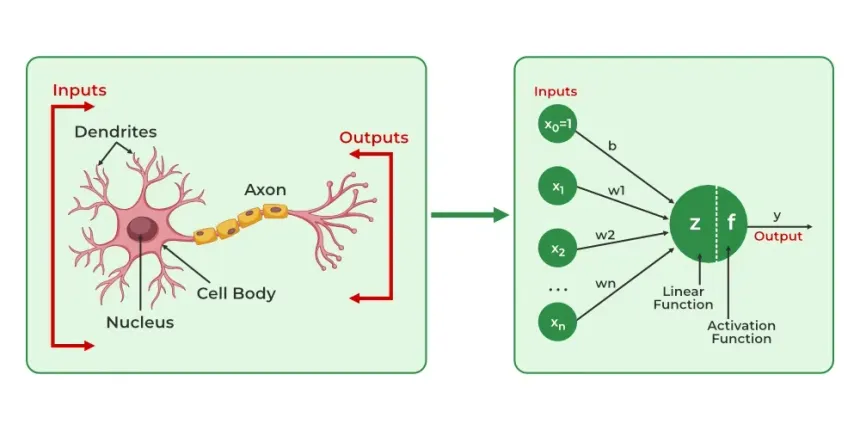

Chaque neurone artificiel fonctionne comme un petit décideur. Voici la formule mathématique qu'il applique :$$Output = f(\sum (Input \times Poids) + Biais)$$
- Les Entrées ($Input$) : Les données qui arrivent (ex: pixel allumé ou éteint).
- Les Poids ($Weights$) : C'est l'importance accordée à chaque entrée. Si un pixel est crucial pour définir un "8", son poids sera élevé. Le réseau apprend ces poids tout seul.
- Le Biais ($Bias$) : Un seuil d'activation. C'est une valeur qui permet au neurone de décaler sa réponse.
- La Fonction d'Activation ($f$) : Elle décide si le neurone doit "tirer" ou non (ex: ReLU, qui met les valeurs négatives à zéro, ou Softmax qui transforme les résultats en pourcentages).


1. Le "Forward Pass" (L'Essai)Le réseau reçoit une image (par exemple un chiffre 7). L'information traverse toutes les couches, subit des multiplications par les Poids ($Weights$) actuels, et le réseau sort une prédiction

2. La "Loss Function" (Le Calcul de l'Erreur)
C'est le juge impartial. On compare la prédiction du modèle avec la réalité (l'étiquette "7"). La fonction calcule une distance mathématique entre la réponse donnée et la bonne réponse.

3. Le "Gradient Descent" (La Stratégie de Correction)
C'est ici que la magie mathématique opère. Le but du jeu est de faire descendre la Loss vers 0.

4. La "Backpropagation" (La Mise à Jour)
Une fois que l'algorithme connaît la direction pour descendre (réduire l'erreur), il remonte le réseau en arrière (de la fin vers le début). Il va modifier légèrement chaque Poids de chaque neurone.
![Dense vs CNN](https://miro.medium.com/max/1400/1*3fA77_mLNiJTSgZFhYnU0Q.png)

# Recurrent Neural Networks (RNN)

C'est l'architecture conçue pour les données séquentielles (le texte, le son, la bourse, la météo). Ici, l'ordre des données compte. Le problème avec les réseaux classiques, c'est qu'ils sont "amnésiques". Ils traitent chaque donnée isolément. Le RNN possède une boucle de rétroaction (Feedback Loop). C'est une forme de mémoire. Au lieu de juste aller de l'entrée vers la sortie, le neurone prend deux choses en entrée :

1. La nouvelle donnée (le mot actuel).

2. L'information de l'étape précédente (le contexte du mot d'avant).

# Convolutional Neural Networks (CNN)


C'est l'architecture reine pour la Vision par Ordinateur (reconnaissance faciale, voitures autonomes, analyse médicale). Le motif de connexion entre les neurones est inspiré par le cortex visuel des animaux.Ils consistent en un empilage de plusieurs couches, dont le but est de prétraiter de petites quantités d'informations. Les couches de convolution applique un kernel sur un input pour le modifier.
Le Problème des réseaux classiques, c'est qu'ils doivent "aplatir" l'image. Il transforme l'image en ligne de pixel alors qu'une image est une matrice. On perd de l'information.


1. Convolution (Le Scan) : Un petit filtre (Kernel) parcourt toute l'image. Il détecte des motifs locaux : d'abord des lignes, puis des courbes, puis des yeux... peu importe où ils sont dans l'image.

2. Pooling (Le Résumé) : On réduit la taille de l'image pour ne garder que l'information essentielle (ex: "il y a une forme ronde ici"). Cela allège le calcul.

3. Classification : À la fin, on connecte tout à un réseau classique.

# Construction de notre premier réseau de neurone (Reconnaissance de Chiffres Manuscrits avec MNIST)

Nous allons construire un cerveau artificiel capable de regarder une image d'un chiffre écrit à la main (0-9) et de deviner de quel chiffre il s'agit. Tout d'abord, le CNN la regarde avec des "filtres" (kernels) pour détecter des formes. La base de données :

* C'est une base de données de **70 000 images** de chiffres écrits à la main (0-9)
* Chaque image fait **28x28 pixels** en noir et blanc
* C'est le dataset le plus utilisé pour apprendre le Deep Learning

![Exemples MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)



## Importation des bibliothèques importantes

Nous allons utiliser :
* **TensorFlow/Keras** : pour créer et entraîner notre réseau de neurones
* **NumPy** : pour manipuler les tableaux de données
* **Matplotlib** : pour visualiser les images et les résultats

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Chargement des Données


Les données sont divisées en deux parties :
* **Train set** (60 000 images) : pour entraîner le modèle
* **Test set** (10 000 images) : pour évaluer les performances

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(f"Images d'entraînement : {X_train.shape}")
print(f"Labels d'entraînement : {y_train.shape}")
print(f"Images de test : {X_test.shape}")
print(f"Labels de test : {y_test.shape}")
print(f"Nous avons {X_train.shape[0]} images d'entraînement")
print(f"Chaque image fait {X_train.shape[1]}x{X_train.shape[2]} pixels")

Images d'entraînement : (60000, 28, 28)
Labels d'entraînement : (60000,)
Images de test : (10000, 28, 28)
Labels de test : (10000,)
Nous avons 60000 images d'entraînement
Chaque image fait 28x28 pixels


# Visualisation des Données

Une image, c'est avant tout une matrice de nombres.

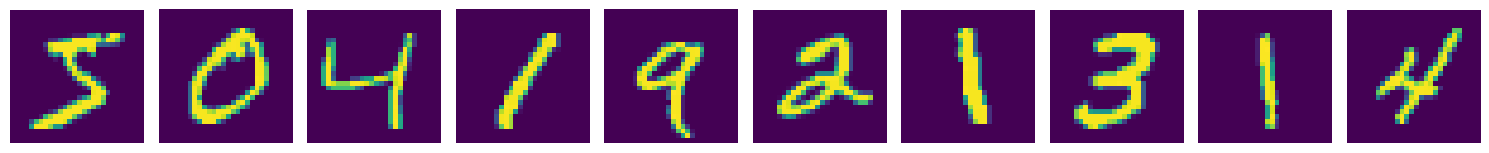

  0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 
  0   0   0   0  62  81   0   0   0   0 
  0   0   0   0 126 163   0   0   0   0 
  0   0   0   0 220 163   0   0   0   0 
  0   0   0   0 222 163   0   0   0   0 


In [22]:
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Prenons la première image
image_exemple = X_train[2]

for i in range(10):
    row_string = ""
    for j in range(10):
        valeur_pixel = int(image_exemple[i, j])
        row_string += f"{valeur_pixel:3d} "
    print(row_string)

# Préparation des Données

Avant d'entraîner notre modèle, nous devons préparer les donnée. Les valeurs des pixels vont de 0 à 255. On va les **diviser par 255** pour avoir des valeurs entre 0 et 1. Pourquoi ? Les réseaux de neurones apprennent mieux avec des valeurs petites

In [13]:
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# Reshape pour CNN (28, 28, 1)
X_train_normalized = X_train_normalized.reshape(-1, 28, 28, 1)
X_test_normalized = X_test_normalized.reshape(-1, 28, 28, 1)

### Architecture CNN

Réseau convolutif pour reconnaissance d'images :

1. **Conv2D** : 32 filtres 3x3, détection de motifs simples
2. **MaxPooling2D** : réduction de dimension 2x2
3. **Conv2D** : 64 filtres 3x3, motifs plus complexes
4. **MaxPooling2D** : réduction de dimension 2x2
5. **Flatten** : aplatissement pour couches denses
6. **Dense** : 128 neurones
7. **Dense** : 10 sorties (softmax)

In [10]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

![Architecture CNN](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

*Architecture typique d'un réseau de neurones convolutif*

## Convolution : comment ça marche ?

![Opération convolution](https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

Un filtre 3x3 glisse sur l'image pour détecter des motifs (bords, courbes, etc.)

![Couches CNN](https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

*Les premières couches détectent des motifs simples, les couches profondes reconnaissent des formes complexes*

In [14]:
model.compile(
    optimizer='adam',  # Algorithme d'optimisation
    loss='sparse_categorical_crossentropy',  # Fonction de perte pour classification
    metrics=['accuracy']  # On veut suivre la précision
)

# Entraînement du modèle

Paramètres d'entraînement :
* **epochs=5** : on passe 5 fois sur toutes les données
* **batch_size=32** : on traite 32 images à la fois
* **validation_split=0.1** : on garde 10% des données pour valider

In [15]:
history=model.fit(
    X_train_normalized, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1  # Affiche la progression
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.9001 - loss: 0.3184 - val_accuracy: 0.9872 - val_loss: 0.0447
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9853 - loss: 0.0460 - val_accuracy: 0.9833 - val_loss: 0.0581
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9903 - loss: 0.0310 - val_accuracy: 0.9882 - val_loss: 0.0443
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.9933 - loss: 0.0205 - val_accuracy: 0.9912 - val_loss: 0.0302
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9908 - val_loss: 0.0348


# Visualisation de l'apprentissage

Regardons comment la précision et la perte évoluent pendant l'entraînement.

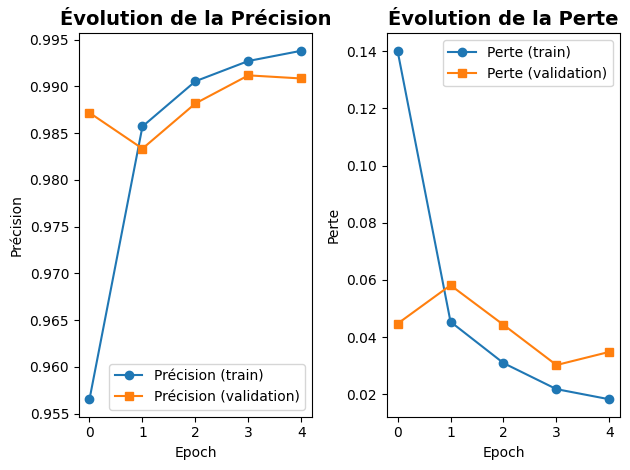

Précision sur les données d'entraînement : 0.9937962889671326
Précision sur les données de validation : 0.9908333420753479


In [16]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Précision (train)', marker='o')
plt.plot(history.history['val_accuracy'], label='Précision (validation)', marker='s')
plt.title('Évolution de la Précision', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte (train)', marker='o')
plt.plot(history.history['val_loss'], label='Perte (validation)', marker='s')
plt.title('Évolution de la Perte', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Perte')
plt.legend()


plt.tight_layout()
plt.show()

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Précision sur les données d'entraînement : {final_train_acc}")
print(f"Précision sur les données de validation : {final_val_acc}")

# Évaluation sur les Données de Test

Maintenant, testons notre modèle sur des données qu'il n'a jamais vues.

In [17]:
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test, verbose=0)

print(f"Perte : {test_loss}")
print(f"Précision : {test_accuracy}")

Perte : 0.029141632840037346
Précision : 0.9909999966621399


# Matrice de Confusion

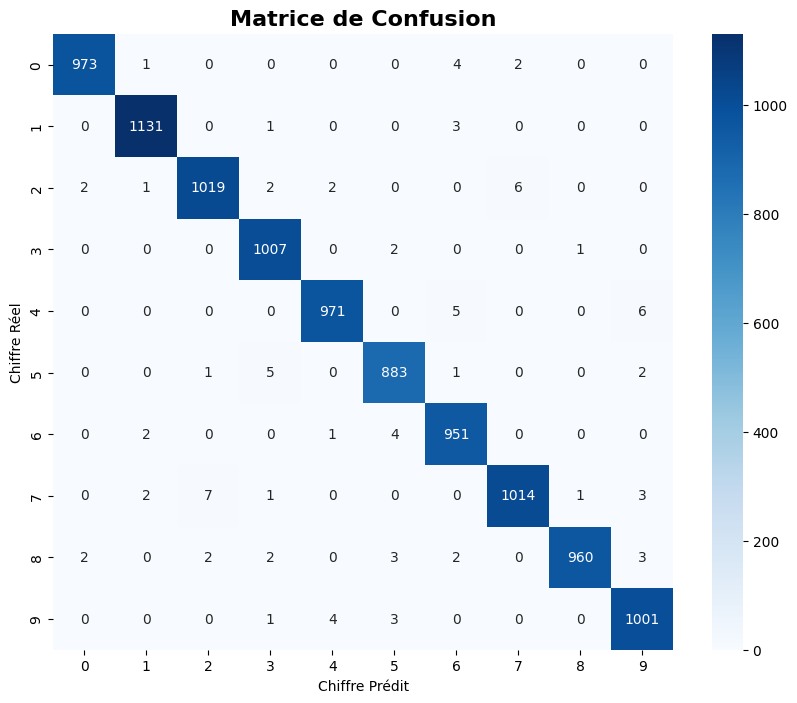

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Prédictions sur tout le test set
y_pred = model.predict(X_test_normalized, verbose=0)
y_pred_labels = np.argmax(y_pred, axis=1)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_labels)

# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Matrice de Confusion', fontsize=16, fontweight='bold')
plt.xlabel('Chiffre Prédit')
plt.ylabel('Chiffre Réel')
plt.show()

# Pour aller plus loin : Pièges et Transfer Learning

## 1. Attention au "Par Cœur" (Overfitting)
Le plus grand ennemi du Deep Learning est l'Overfitting.
C'est quand le modèle apprend les images d'entraînement par cœur au lieu de comprendre la logique.
* **Symptôme :** 99% de réussite à l'entraînement, mais 50% sur le test.
* **La Solution :** Le Dropout. On désactive aléatoirement certains neurones pendant l'entraînement pour forcer les autres à travailler plus dur.

## 2. Le Transfer Learning
Pour des tâches complexes (reconnaître des races de chiens, des tumeurs, etc.), on n'entraîne pas un réseau de zéro. On utilise des modèles créés par les géants de la Tech (Google, Microsoft) qui ont déjà vu des millions d'images.
* **Exemples célèbres :** ResNet, VGG16, MobileNet.

# Ressources

- Pour la théorie du Deep learning: https://www.deeplearningbook.org/

- Pour la visualisation d'un réseaux de données: https://adamharley.com/nn_vis/cnn/2d.html

- Playlist de vidéo de 3Blue1Brown: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

- Document de recherche sur la comparaison entre le cerveau humain et le réseaux de neurones : https://www.scholarsresearchlibrary.com/articles/comparative-study-of-biological-and-artificial-neural-networks.pdf